In [35]:
import pandas as pd
import numpy as np


# Loading the data

In [36]:
df = pd.read_csv("heart.csv")


In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Exploratory Data Analysis (EDA)

In [38]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain,4: asymptomatic",
"resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
" maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
"the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",
"thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain,4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no null values in our dataset

In [41]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [42]:
df.shape

(303, 14)

In [43]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Visulization

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


We have 165 person with Heart disease and 138 person without heart disease, so our dataset is balanced


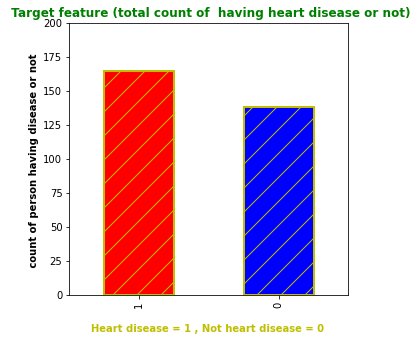

In [45]:
plt.figure(figsize=(5,5))

df.target.value_counts().plot(kind="bar", color=["r", "b"],edgecolor="y",linewidth=2,hatch='/')
plt.ylim(0,200)
plt.title(" Target feature (total count of  having heart disease or not)",fontweight="bold",color="g")
plt.xlabel(" \nHeart disease = 1 , Not heart disease = 0 ",fontweight="bold",color="y")
plt.ylabel(" count of person having disease or not  ",fontweight="bold")

print("\nWe have 165 person with Heart disease and 138 person without heart disease, so our dataset is balanced")

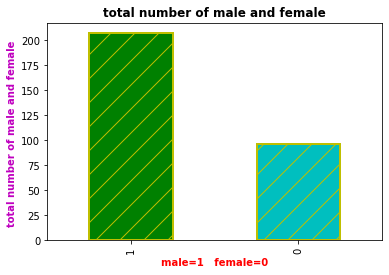

In [46]:
plt.title("total number of male and female",fontweight="bold")
plt.ylabel("total number of male and female ",fontweight="bold",color="m")
plt.xlabel("male=1   female=0",fontweight="bold",color="r")
df["sex"].value_counts().plot(kind="bar",color=["g","c"],edgecolor="y",linewidth=2,hatch='/');


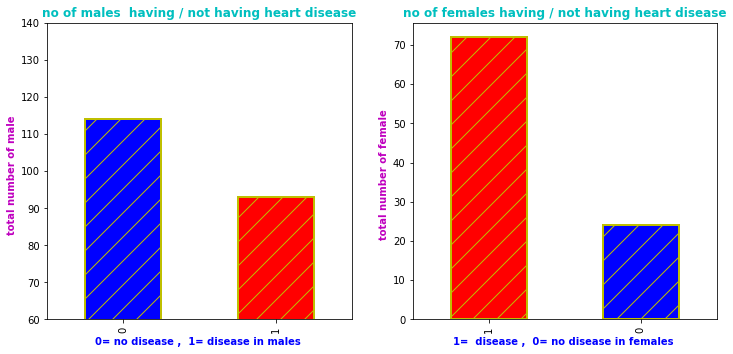

In [47]:

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("no of males  having / not having heart disease",fontweight="bold",color="c")
plt.ylabel("total number of male  ",fontweight="bold",color="m")
plt.xlabel("0= no disease ,  1= disease in males ",fontweight="bold",color="b")
plt.ylim(60,140)
df[df["sex"] == 1]["target"].value_counts().plot(kind="bar",color=["b","r"],edgecolor="y",linewidth=2,hatch='/')

#plt.legend()
plt.subplot(2,2,2)
plt.title("no of females having / not having heart disease",fontweight="bold",color="c")
plt.ylabel("total number of female  ",fontweight="bold",color="m")
plt.xlabel("1=  disease ,  0= no disease in females ",fontweight="bold",color="b")

df[df["sex"] == 0]["target"].value_counts().plot(kind="bar",color=["r","b"],edgecolor="y",linewidth=2,hatch='/')
plt.show()
#df[df["sex"] == 1]["target"].value_counts().plot(kind="bar",color="r")
#plt.savefig("pplhaving.png")

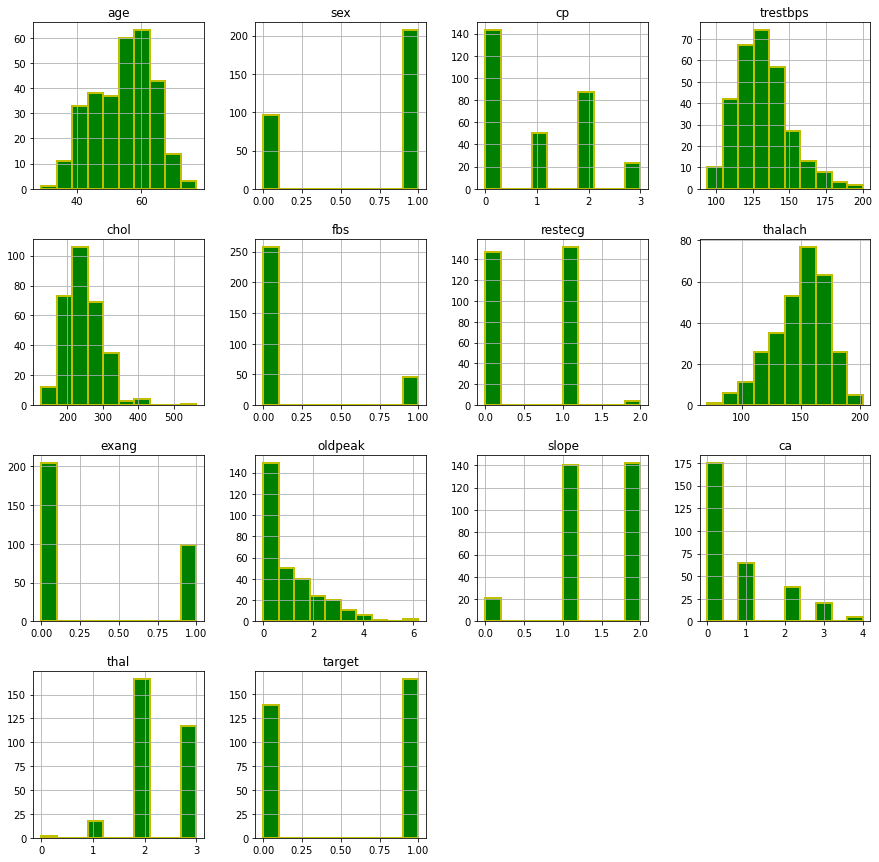

In [48]:
df.hist(figsize=(15,15),color="g",edgecolor="y",linewidth=2,linestyle='-');

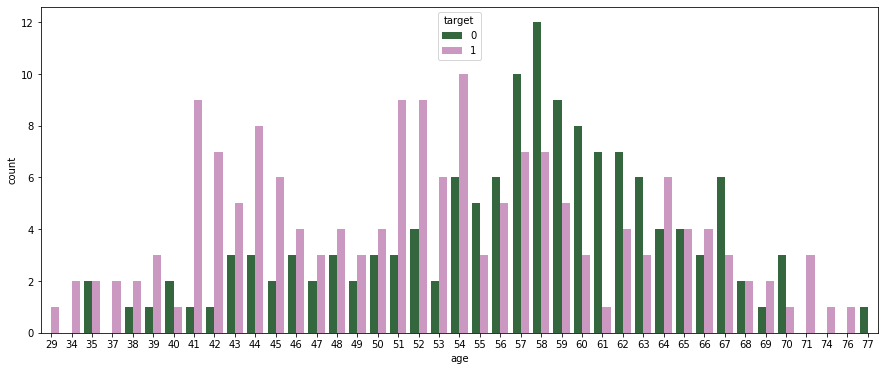

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='cubehelix')
plt.show()

In [50]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [51]:
print(" categorical val ",categorical_val)
print("continous val ",continous_val)

 categorical val  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous val  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Ploting categorical features 

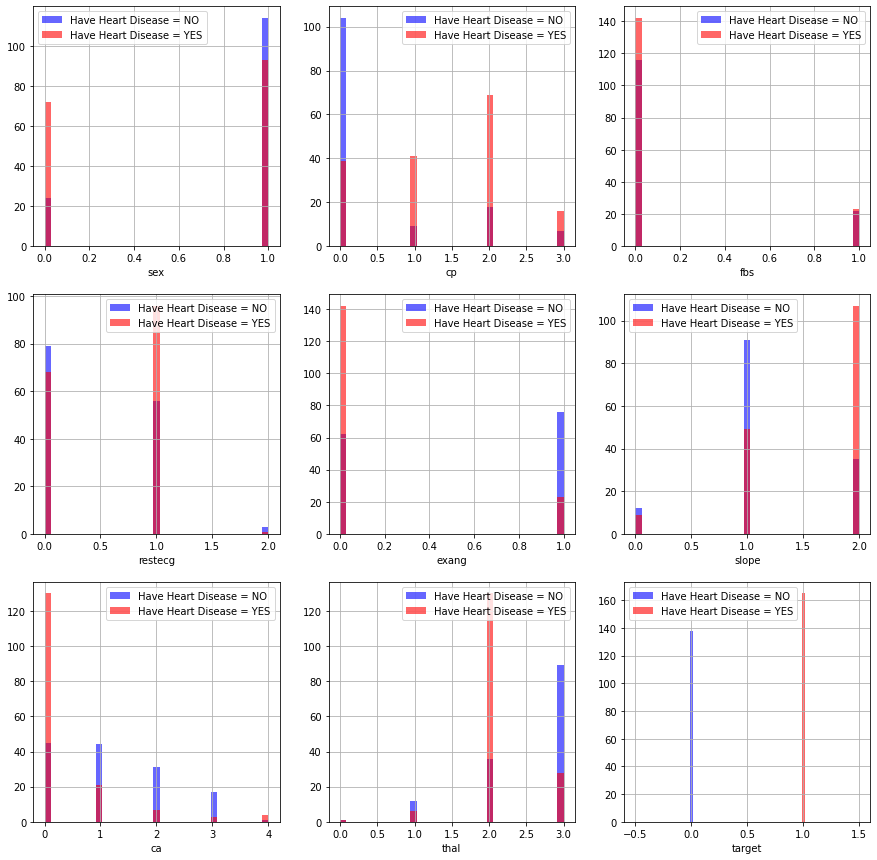

In [52]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val,1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)



1.cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

2.restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

3.exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

4.slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

5.ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

6.thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

# ploting continous features below

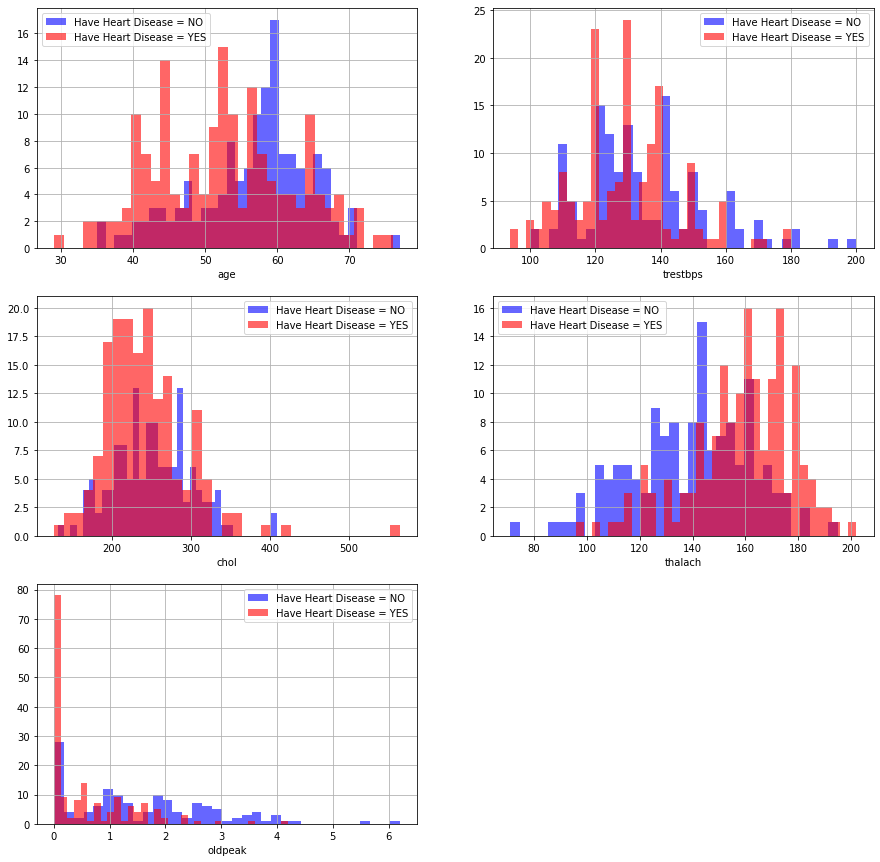

In [53]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


1.trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

2.chol {serum cholestoral in mg/dl} : above 200 is cause for concern.

3.thalach {maximum heart rate achieved} : People that have acheived a maximum more than 140 are more likely to have heart disease.

4.oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

# Age vs. Max Heart Rate for Heart Disease

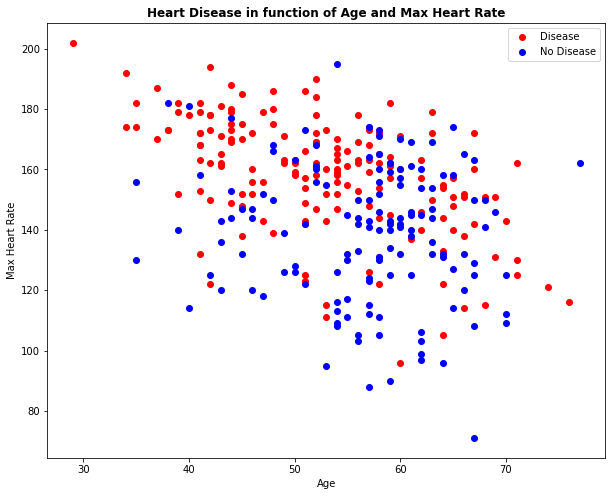

In [54]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="r")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate",fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
#terminator elimnates <matplotlib.legend.Legend at 0x7f39518951d0>


# Correlation Matrix (heat map)

(14.3, -0.3)

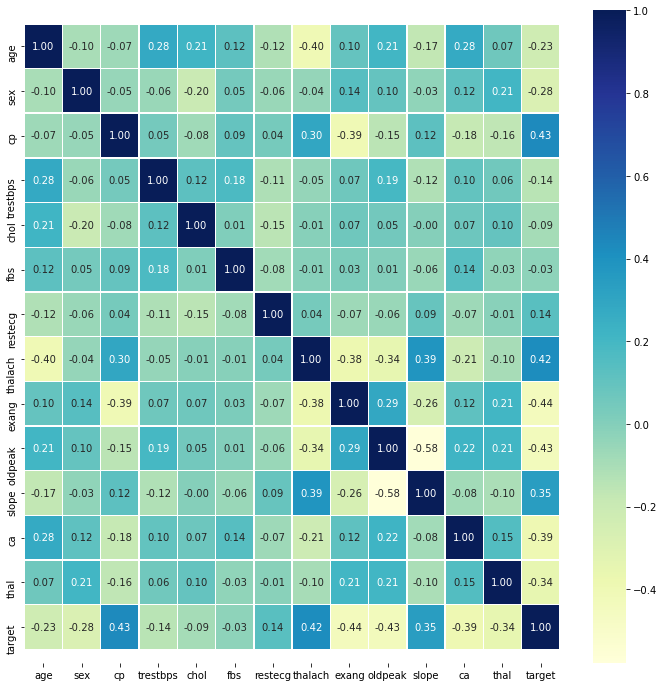

In [55]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.3, top - 0.3)


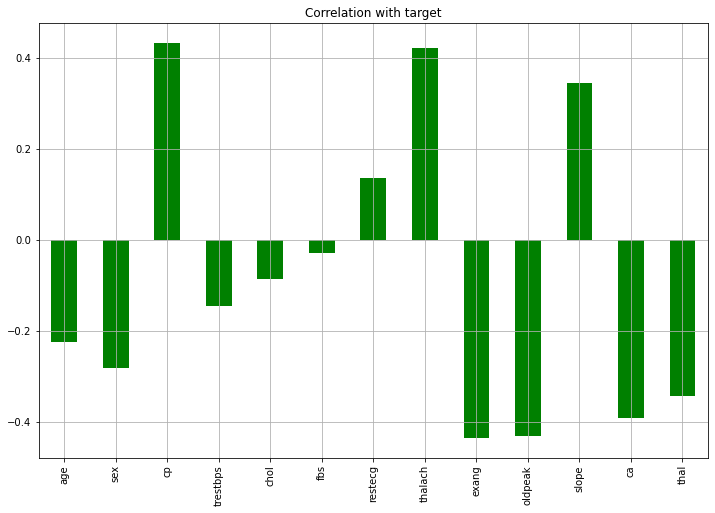

In [56]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target",color="g");


1.fbs and chol are the lowest correlated with the target variable.

2.All other variables have a significant correlation with the target variable.


# Data processing

# One hot encoding

In [57]:
if 'target'  in categorical_val:
    categorical_val.remove('target')
    dataset = pd.get_dummies(df, columns = categorical_val)
else:
    pass

dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [58]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


# Standardization

In [59]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])


# Performance of an Algorithm

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
train_score_1x={}

f1_train1x={}
precision_train1x={}
recall_train1x={}
test_score_1x={}
f1_test1x={}
precision_test1x={}
recall_test1x={}
def print_score(algo_name,clf, X_train, y_train, X_test, y_test, train=True):
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        train_score_1x["Training score "+algo_name]=accuracy_score(y_train, pred) * 100
        f1_train1x[algo_name+" training f1 score "]=f1_score(y_train, pred) * 100
        precision_train1x[algo_name+" training precision score"]=precision_score(y_train, pred) * 100
        recall_train1x[algo_name+" training recall score"]= recall_score(y_train, pred) * 100
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        test_score_1x["Testing score"+algo_name]=accuracy_score(y_test, pred) * 100
        f1_test1x[algo_name+" testing f1 score"]=f1_score(y_test, pred) * 100
        precision_test1x[algo_name+" testing precision score"]=precision_score(y_test, pred) * 100
        recall_test1x[algo_name+" testing recall score"]= recall_score(y_test, pred) * 100
    #return f1_train , precision_train ,recall_train,f1_test,precision_test,recall_test

# Splitting data into train and test set

In [61]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [62]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
179,0.290464,1.049520,0.574662,-1.646316,-0.379244,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
228,0.511041,2.191778,0.806568,0.409017,-0.724323,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
111,0.290464,1.049520,-2.324160,1.021244,-0.724323,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
246,0.180175,0.135714,3.144951,0.015443,0.742260,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
60,1.834507,-1.234996,0.362082,-0.859167,-0.896862,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.371269,0.478391,0.999823,-1.209011,2.726460,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
19,1.613930,0.478391,-0.140381,0.059173,0.655990,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
143,1.393352,-1.463447,-0.449589,-0.334401,-0.638053,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
79,0.400752,-1.520560,-0.121055,0.190365,-0.379244,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try  different machine learning models:

Logistic Regression
K-Nearest Neighbours Classifier
Decision Tree Classifier
Random Forest Classifier
XGBoost Classifier

# Applying  Algorithms (without hypertuning)

# Decsion tree

In [63]:
from sklearn.tree import DecisionTreeClassifier


tree2 = DecisionTreeClassifier(random_state=42)
tree2.fit(X_train, y_train)

print_score("*dt ",tree2, X_train, y_train, X_test, y_test, train=True)
print_score("*dt ",tree2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
Classification Report:	Precision Score: 84.09%
			Recall Score: 74.00%
			F1 score: 78.72%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



# Random Forest below

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest2 = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest2.fit(X_train, y_train)

print_score("*random\nforest",rand_forest2, X_train, y_train, X_test, y_test, train=True)
print_score("*random\n forest",rand_forest2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier2 = KNeighborsClassifier()
knn_classifier2.fit(X_train, y_train)

print_score("*KNN",knn_classifier2, X_train, y_train, X_test, y_test, train=True)
print_score("*KNN",knn_classifier2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 87.18%
			Recall Score: 88.70%
			F1 score: 87.93%
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 88.00%
			Recall Score: 88.00%
			F1 score: 88.00%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



# Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(solver='liblinear')
log_reg2.fit(X_train, y_train);
print_score("*log-reg",log_reg2, X_train, y_train, X_test, y_test, train=True)
print_score("*log-reg",log_reg2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 86.54%
			Recall Score: 90.00%
			F1 score: 88.24%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



# SVM

In [67]:
from sklearn.svm import SVC
svm2 = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm2.fit(X_train, y_train);
print_score("*SVM",svm2, X_train, y_train, X_test, y_test, train=True)
print_score("*SVM",svm2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.40%
_______________________________________________
Classification Report:	Precision Score: 93.16%
			Recall Score: 94.78%
			F1 score: 93.97%
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
Classification Report:	Precision Score: 89.80%
			Recall Score: 88.00%
			F1 score: 88.89%
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



# xgboost

In [69]:
from xgboost import XGBClassifier 
xgboost2 = XGBClassifier()
#xgboost1=RandomizedSearchCV(xgboost1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);
#xgboost1.fit(X_train, y_train)

In [70]:
xgboost2=XGBClassifier()
xgboost2.fit(X_train, y_train);

In [71]:
print_score("*xgboost",xgboost2 , X_train, y_train, X_test, y_test, train=True)
print_score("*xgboost",xgboost2 , X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



# Voting classifier

In [72]:
from sklearn.ensemble import VotingClassifier 


In [73]:
voting_clf2 = VotingClassifier( estimators=[
                                          ('lr',log_reg2 ), 
                                         ('knn',knn_classifier2 ),
                                          ('dt',tree2),
                                         ('rf',rand_forest2),
                                          ('xgb',xgboost2),
                                          
                                          ],
                                            voting ='soft')
voting_clf2.fit(X_train,y_train);

In [74]:
for clf in (
            log_reg2,
            knn_classifier2,
            tree2,
            rand_forest2,
            xgboost2,
            voting_clf2):
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)*100)

LogisticRegression 86.81318681318682
KNeighborsClassifier 86.81318681318682
DecisionTreeClassifier 78.02197802197803
RandomForestClassifier 82.41758241758241
XGBClassifier 82.41758241758241
VotingClassifier 80.21978021978022


In [75]:
print_score("*voting",voting_clf2, X_train, y_train, X_test, y_test, train=True)
print_score("*voting",voting_clf2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 80.22%
_______________________________________________
Classification Report:	Precision Score: 82.00%
			Recall Score: 82.00%
			F1 score: 82.00%
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 9 41]]



# Algorithm performance before hypertuning

So as we have dictionries in print_score()  function 
we will extract value from these dictionaries for 
ploting purpose  
those dictionaries are
train_score_1x={}
f1_train1x={}
precision_train1x={}
recall_train1x={}
test_score_1x={}
f1_test1x={}
precision_test1x={}
recall_test1x={}

In [76]:
#test_scores=[test_score1,test_score2,test_score3,test_score4,test_score5]


algos_names1=["Decision\ntree","Random\nforest", "KNN","Logistic\nregression","SVM","xgboost"]
train_score_1=list(train_score_1x.values())
test_score_1=list(test_score_1x.values())
f1_test1=list(f1_test1x.values())
precision_test1=list(precision_test1x.values())
recall_test1=list(recall_test1x.values())
f1_train1=list(f1_train1x.values())
precision_train1=list(precision_train1x.values())
recall_train1=list(recall_train1x.values())


In [77]:
test_score_1

[78.02197802197803,
 82.41758241758241,
 86.81318681318682,
 86.81318681318682,
 87.91208791208791,
 82.41758241758241,
 80.21978021978022]

Genrating csv of above algorithms

In [78]:
results_df = pd.DataFrame(data=[["Random forest",test_score_1[1],f1_test1[1],precision_test1[1],recall_test1[1]],
                                ["KNN",test_score_1[2],f1_test1[2],precision_test1[2],recall_test1[2]],
                                ["Decision tree",test_score_1[0],f1_test1[0],precision_test1[0],recall_test1[0]],
                                ["Logistic Regression", test_score_1[3],f1_test1[3],precision_test1[3],recall_test1[3]],
                                ["SVM", test_score_1[4],f1_test1[4],precision_test1[4],recall_test1[4]] ,
                                ["Xgboost", test_score_1[5],f1_test1[5],precision_test1[5],recall_test1[5]] ,
                                ["Voting", test_score_1[6],f1_test1[6],precision_test1[6],recall_test1[6]] 
                                
                               ], 
                          columns=['Model', 'Testing Accuracy %'
                                  ,'f1 test %','Precision test %','Recall test %'])



#results_df.to_csv("results/*trainresults.csv") 

results_df

,Model,Testing Accuracy %,f1 test %,Precision test %,Recall test %
0,Random forest,82.417582,84.000000,84.000000,84.0
1,KNN,86.813187,88.000000,88.000000,88.0
2,Decision tree,78.021978,78.723404,84.090909,74.0
3,Logistic Regression,86.813187,88.235294,86.538462,90.0
4,SVM,87.912088,88.888889,89.795918,88.0
5,Xgboost,82.417582,84.000000,84.000000,84.0
6,Voting,80.219780,82.000000,82.000000,82.0


# Algorithms  with HYPERPARAMETER TUNING 

# Decision tree 

In [79]:
from sklearn. tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }


tree1 = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree1, params, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)



Verbose is a general programming term for produce lots of logging output.
You can think of it as asking the program to "tell me everything about what you are doing all the time".
Just set it to true and see what happens.

iid : boolean, default=True

    If True, the data is assumed to be identically distributed across the folds, and the loss minimized is the total 
    loss per sample, and not the mean loss across the folds.

n_jobs : int, default=1

    Number of jobs to run in parallel.

In [80]:
#grid_search_cv.fit(X_train, y_train)

In [81]:
#grid_search_cv.best_estimator_ 

In [82]:
#grid_search_cv.best_score_
#grid_search_cv.best_params_



best_estimator_ : estimator -> Estimator that was chosen by the search, 
                i.e. estimator which gave highest score 
                (or smallest loss if specified) on the left 
                out data. Not available if refit=False.

best_score_ : float

    Score of best_estimator on the left out data.

best_params_ : dict

    Parameter setting that gave the best results on the hold out data.

scorer_ : function

    Scorer function used on the held out data to 
    choose the best parameters for the model

In [83]:
tree1 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')

In [84]:
tree1.fit(X_train, y_train)


print_score("Decision tree",tree1,X_train, y_train, X_test, y_test, train=True)
print_score("Decision tree",tree1, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 85.38%
_______________________________________________
Classification Report:	Precision Score: 83.87%
			Recall Score: 90.43%
			F1 score: 87.03%
_______________________________________________
Confusion Matrix: 
 [[ 77  20]
 [ 11 104]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 86.00%
			Recall Score: 86.00%
			F1 score: 86.00%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 7 43]]



# logistic regression

In [85]:
from sklearn.linear_model import LogisticRegression
"""
params1 = {"solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga"), 
           
          "C":(list(range(1, 100)))  ,
           "multi_class":("auto", "ovr")
          }
"""
log_reg = LogisticRegression(random_state=42,solver="liblinear")

grid_search_cv = GridSearchCV(log_reg, params1, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

grid_search_cv.fit(X_train, y_train)


log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [86]:
#grid_search_cv.best_estimator_ 



In [87]:
log_reg = LogisticRegression(C=1,solver="newton-cg")
log_reg.fit(X_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [88]:
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=True)
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 84.91%
			Recall Score: 90.00%
			F1 score: 87.38%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



# Svm

In [89]:
from sklearn import svm

In [90]:
params= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [91]:
svm1 = svm.SVC(kernel='linear') 
svmrn=RandomizedSearchCV(svm1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);


In [92]:
#svmrn.fit(X_train, y_train)

In [93]:
#svmrn.best_estimator_

In [94]:
svm1=svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
svm1.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [96]:
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=True)
print_score("SVM",svm1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.91%
_______________________________________________
Classification Report:	Precision Score: 84.30%
			Recall Score: 88.70%
			F1 score: 86.44%
_______________________________________________
Confusion Matrix: 
 [[ 78  19]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 88.00%
			Recall Score: 88.00%
			F1 score: 88.00%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



# KNN algorithm

In [97]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 89.01%


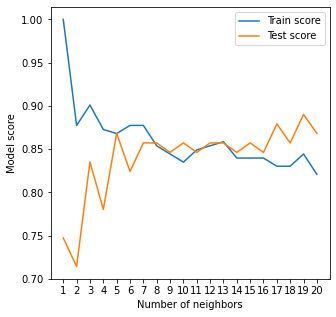

In [98]:
plt.figure(figsize=(5,5))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [99]:
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)

print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 84.43%
_______________________________________________
Classification Report:	Precision Score: 82.54%
			Recall Score: 90.43%
			F1 score: 86.31%
_______________________________________________
Confusion Matrix: 
 [[ 75  22]
 [ 11 104]]

Test Result:
Accuracy Score: 89.01%
_______________________________________________
Classification Report:	Precision Score: 87.04%
			Recall Score: 94.00%
			F1 score: 90.38%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 3 47]]



# Random forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

"""
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier()

grid_search_cv2 = GridSearchCV(rand_forest, random_grid, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

"""


'\nn_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]\nmax_features = [\'auto\', \'sqrt\']\nmax_depth = [int(x) for x in np.linspace(10, 110, num=11)]\nmax_depth.append(None)\nmin_samples_split = [2, 5, 10]\nmin_samples_leaf = [1, 2, 4]\nbootstrap = [True, False]\n\nrandom_grid = {\'n_estimators\': n_estimators, \'max_features\': max_features,\n               \'max_depth\': max_depth, \'min_samples_split\': min_samples_split,\n               \'min_samples_leaf\': min_samples_leaf, \'bootstrap\': bootstrap}\n\nrand_forest = RandomForestClassifier()\n\ngrid_search_cv2 = GridSearchCV(rand_forest, random_grid, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)\n\n'

 n_estimators = number of trees in the foreset
    
    max_features = max number of features considered for splitting a node
    
    max_depth = max number of levels in each decision tree
    
    min_samples_split = min number of data points placed in a node before the node is split
    
    min_samples_leaf = min number of data points allowed in a leaf node
    
    bootstrap = method for sampling data points (with or without replacement)

In [101]:
#grid_search_cv2.fit(X_train, y_train)

In [102]:
#grid_search_cv2.best_params_
#rand_forest.fit(X_train, y_train)

rand_forest = RandomForestClassifier(bootstrap= True,max_depth= 10, min_samples_split= 5, n_estimators= 200)



In [103]:
rand_forest.fit(X_train,y_train);

In [104]:
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.11%
_______________________________________________
Classification Report:	Precision Score: 98.26%
			Recall Score: 98.26%
			F1 score: 98.26%
_______________________________________________
Confusion Matrix: 
 [[ 95   2]
 [  2 113]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



# Xgboost

In [105]:
params={
    "learning_rate" :  [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [106]:
from xgboost import XGBClassifier 
xgboost1 = XGBClassifier()
#xgboost1=RandomizedSearchCV(xgboost1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);
#xgboost1.fit(X_train, y_train)

In [107]:
#xgboost1.best_estimator_



In [108]:
xgboost1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgboost1.fit(X_train, y_train);

In [109]:
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=True)
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.57%
_______________________________________________
Classification Report:	Precision Score: 90.60%
			Recall Score: 92.17%
			F1 score: 91.38%
_______________________________________________
Confusion Matrix: 
 [[ 86  11]
 [  9 106]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



# Voting classifier

In [110]:
from sklearn.ensemble import VotingClassifier 


In [111]:
voting_clf = VotingClassifier( estimators=[
                                          ('lr',log_reg ), 
                                         ('knn',knn_classifier ),
                                          ('dt',tree1),
                                         ('rf',rand_forest),
                                          ('xgb',xgboost1),
                                          
                                          ],
                                            voting ='soft')
voting_clf.fit(X_train,y_train);

In [112]:
for clf in (
            log_reg,
            knn_classifier,
            tree1,
            rand_forest,
            xgboost1,
            voting_clf):
    voting_clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)*100)

LogisticRegression 85.71428571428571
KNeighborsClassifier 89.01098901098901
DecisionTreeClassifier 84.61538461538461
RandomForestClassifier 82.41758241758241
XGBClassifier 83.51648351648352
VotingClassifier 83.51648351648352


In [113]:
print_score("Voting Classifier", voting_clf,X_train, y_train, X_test, y_test, train=True)
print_score("Voting Classifier",voting_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.62%
_______________________________________________
Classification Report:	Precision Score: 89.08%
			Recall Score: 92.17%
			F1 score: 90.60%
_______________________________________________
Confusion Matrix: 
 [[ 84  13]
 [  9 106]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 84.31%
			Recall Score: 86.00%
			F1 score: 85.15%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 7 43]]



# Comparing effect of hyperparameter tuning on our model

below are returned scores from print_scores() fucntion

In [114]:
#test_scores=[test_score1,test_score2,test_score3,test_score4,test_score5]


algos_names=["Dt", "Log-reg","SVM", "KNN", "Rnf","xgboost", "Voting"]
train_score_=list(train_score_1x.values())[7:]

test_score_=list(test_score_1x.values())[7:]
f1_test=list(f1_test1x.values())[7:]
precision_test=list(precision_test1x.values())[7:]
recall_test=list(recall_test1x.values())[7:]
f1_train=list(f1_train1x.values())[7:]
precision_train=list(precision_train1x.values())[7:]
recall_train=list(recall_train1x.values())[7:]


In [115]:
test_score_1x

{'Testing score*dt ': 78.02197802197803,
 'Testing score*random\n forest': 82.41758241758241,
 'Testing score*KNN': 86.81318681318682,
 'Testing score*log-reg': 86.81318681318682,
 'Testing score*SVM': 87.91208791208791,
 'Testing score*xgboost': 82.41758241758241,
 'Testing score*voting': 80.21978021978022,
 'Testing scoreDecision tree': 84.61538461538461,
 'Testing scoreLogistic regression': 85.71428571428571,
 'Testing scoreSVM': 86.81318681318682,
 'Testing scoreKNN': 89.01098901098901,
 'Testing scoreRandom forest': 82.41758241758241,
 'Testing scorexgboost': 83.51648351648352,
 'Testing scoreVoting Classifier': 83.51648351648352}

In [116]:
results_df1 = pd.DataFrame(data=[["Random forest",test_score_[4],f1_test[4],precision_test[4],recall_test[4]],
                                ["KNN",test_score_[3],f1_test[3],precision_test[3],recall_test[3]],
                                ["Decision tree",train_score_[0],f1_test[0],precision_test[0],recall_test[0]],
                                ["Logistic Regression", test_score_[1],f1_test[1],precision_test[1],recall_test[1]],
                                ["SVM", test_score_[2],f1_test[2],precision_test[2],recall_test[2]],
                                ["xgboost",test_score_[5],f1_test[5],precision_test[5],recall_test[5]],
                                ["Voting",test_score_[6],f1_test[6],precision_test[6],recall_test[6]]
                                
                               
                                ], 
                          columns=['Model', 'Testing Accuracy %'
                                  ,'f1 test %','Precision test %','Recall test %'])
results_df1

,Model,Testing Accuracy %,f1 test %,Precision test %,Recall test %
0,Random forest,82.417582,84.000000,84.000000,84.0
1,KNN,89.010989,90.384615,87.037037,94.0
2,Decision tree,85.377358,86.000000,86.000000,86.0
3,Logistic Regression,85.714286,87.378641,84.905660,90.0
4,SVM,86.813187,88.000000,88.000000,88.0
5,xgboost,83.516484,84.848485,85.714286,84.0
6,Voting,83.516484,85.148515,84.313725,86.0


# Test plots

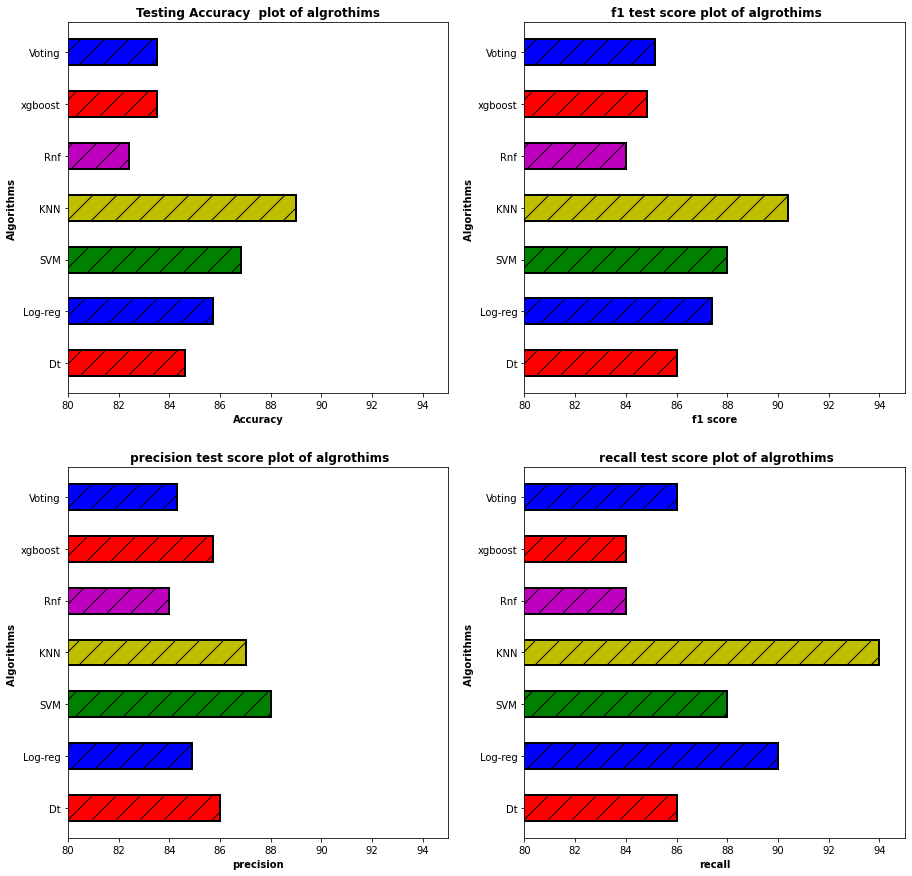

In [117]:

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Testing Accuracy  plot of algrothims",fontweight="bold")


plt.ylabel("Algorithms",fontweight="bold")
plt.xlabel("Accuracy",fontweight="bold")
plt.xlim(80,95)
plt.barh(algos_names,test_score_,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='/');



plt.subplot(2,2,2)
plt.title(" f1 test score plot of algrothims",fontweight="bold")

plt.xlim(80,95)
plt.ylabel("Algorithms ",fontweight="bold")
plt.xlabel("f1 score",fontweight="bold")

plt.barh(algos_names,f1_test,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='/');



plt.subplot(2,2,3)
plt.title(" precision test score plot of algrothims",fontweight="bold")


plt.ylabel("Algorithms ",fontweight="bold")
plt.xlabel("precision",fontweight="bold")
plt.xlim(80,95)
plt.barh(algos_names,precision_test,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='/');


plt.subplot(2,2,4)
plt.title(" recall test score plot of algrothims",fontweight="bold")


plt.ylabel("Algorithms ",fontweight="bold")
plt.xlabel("recall",fontweight="bold")
plt.xlim(80,95)
plt.barh(algos_names,recall_test,color=['r','b','g','y','m'],height=0.5,edgecolor="k",linewidth=2,hatch='/');

In [118]:
def feature_imp(dataset, model):
    fi = pd.DataFrame()
    fi["feature"] = dataset.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=True)

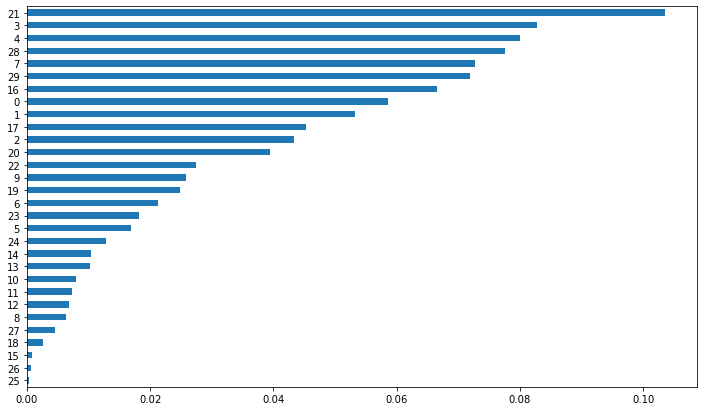

In [119]:
feature_imp(X, rand_forest).plot(kind='barh', figsize=(12,7), legend=False)
plt.show()

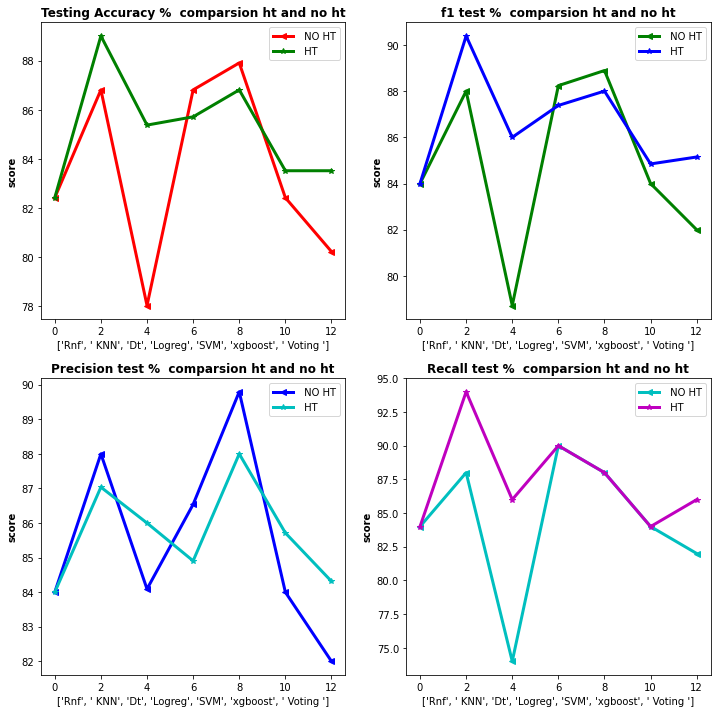

In [120]:
plt.figure(figsize=(12,12))
def plot_accuracy_algos_ht_no_ht(param1,colors,xlabal):
    for i in range(1,5):
        plt.subplot(2,2,i)
        plt.title(columns_result_csv[i-1]+"  comparsion ht and no ht",fontweight="bold")
        plt.ylabel("score",fontweight="bold")
        plt.xlabel(list(xlabal))
        
        plt.plot([0,2,4,6,8,10,12],results_df[param1[i-1]],label=" NO HT",linewidth="3",marker='<',color=colors[i-1])
        plt.plot([0,2,4,6,8,10,12],results_df1[param1[i-1]],label=" HT",linewidth="3",marker='*',color=colors[i])
        plt.legend()

colors=['r','g','b','c','m']# save colors in list , used in above loop iterativeliy
columns_result_csv=['Testing Accuracy %','f1 test %','Precision test %','Recall test %']
xlabal=['Rnf',' KNN','Dt','Logreg','SVM','xgboost',' Voting ']

plot_accuracy_algos_ht_no_ht(columns_result_csv,colors,xlabal) 
#passing these params above in function "Testing Accuracy %","f1 test %","Precision test %","Recall test %"

#plt.savefig("accurcaycomp.png")